In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [3]:
# This function is the Riegel formula for predicting race time T2 over distance D2 
# from a previous time T1 over a distance D1

def Riegel(T1_sec, D1, D2):
    T2_sec = (T1_sec) * (float(D2)/float(D1))*1.06
    return T2_sec

# convert times in the format min:sec or min:sec:millisec (e.g. 14:32 or 14:32:00) to seconds
def time_to_secs(time):
    secs = int(float(str(time)[:2])*60 + float(str(time)[3:5]))
    return secs

def time_to_secs_hours(time):
    secs = int(float(str(time)[0])*60*60 + float(str(time)[2:4])*60 + float(str(time)[6:8])*60)
    return secs

In [9]:
# Read the data into a pandas dataframe

df_M = pd.read_csv('runbritain_data_2016_M_5K.csv')
print df_M.head()

   athleteid age_group     5K    10K     HM  Mar
0       5577       SEN  13:52    NaN    NaN  NaN
1      19569       U23  14:03  29:30    NaN  NaN
2      17296       SEN  14:04  29:55    NaN  NaN
3      12131       SEN  14:06    NaN    NaN  NaN
4      47493       SEN  14:06  29:43  65:24  NaN


In [44]:
athlete_M_HM = [time_to_secs(i) for i in df_M['HM'] if str(i) != 'nan' and int(str(i)[0]) > 3]
athlete_HM_2 = [time_to_secs_hours(i) for i in df_M['HM'] if str(i) != 'nan' and int(str(i)[0]) < 3]
athlete_M_HM = athlete_M_HM + athlete_HM_2
athlete_M_5k_HM = [time_to_secs(df_M['5K'][i]) for i in range(0, len(df_M['5K'])) if str(df_M['HM'][i]) != 'nan']

athlete_M_Mar = [time_to_secs_hours(i) for i in df_M['Mar'] if str(i) != 'nan']
athlete_M_5k_Mar = [time_to_secs(df_M['5K'][i]) for i in range(0, len(df_M['5K'])) if str(df_M['Mar'][i]) != 'nan']

athlete_M_10k = [time_to_secs(i) for i in df_M['10K'] if str(i) != 'nan']
athlete_M_5k_10k = [time_to_secs(df_M['5K'][i]) for i in range(0, len(df_M['5K'])) if str(df_M['10K'][i]) != 'nan']

In [32]:
# Make an array for 5k times and calculate 10k times using the Riegel formula

#time_5k = np.arange(15*60, 21*60, 10)
#time_10k = [Riegel(i, 5, 10) for i in time_5k]

time_5k = np.arange(athlete_M_5k_10k[0], athlete_M_5k_10k[-1]+11, 10)
time_10k = [Riegel(i, 5, 10) for i in time_5k]
time_HM = [Riegel(i, 5, 21.24334) for i in time_5k]
time_Mar = [Riegel(i, 5, 42.16481) for i in time_5k]

In [34]:
# Convert all times into minutes and plot both the model and the times

time_5k_mins = [i/60.0 for i in time_5k]
time_10k_mins = [i/60.0 for i in time_10k]
time_HM_mins = [i/60.0 for i in time_HM]
time_Mar_mins = [i/60.0 for i in time_Mar]

athlete_M_10k_mins = [i/60.0 for i in athlete_M_10k]
athlete_M_5k_10k_mins = [i/60.0 for i in athlete_M_5k_10k]

athlete_M_HM_mins = [i/60.0 for i in athlete_M_HM]
athlete_M_5k_HM_mins = [i/60.0 for i in athlete_M_5k_HM]

athlete_M_Mar_mins = [i/60.0 for i in athlete_M_Mar]
athlete_M_5k_Mar_mins = [i/60.0 for i in athlete_M_5k_Mar]

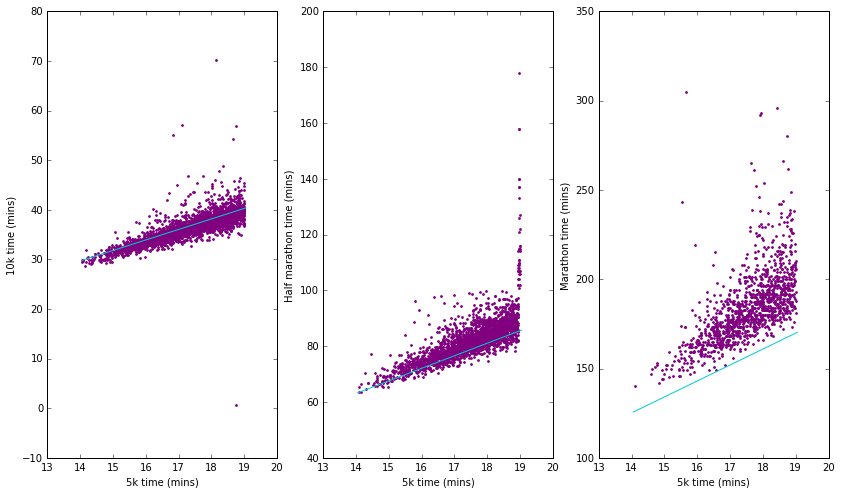

In [39]:
plt.figure(figsize = (14, 8))

plt.subplot(1, 3, 1)
plt.plot(time_5k_mins, time_10k_mins, color = 'darkturquoise')
plt.scatter(athlete_M_5k_10k_mins, athlete_M_10k_mins, color = 'purple', s = 3)
plt.xlabel("5k time (mins)")
plt.ylabel("10k time (mins)")

plt.subplot(1, 3, 2)
plt.plot(time_5k_mins, time_HM_mins, color = 'darkturquoise')
plt.scatter(athlete_M_5k_HM_mins, athlete_M_HM_mins, color = 'purple', s = 3)
plt.xlabel("5k time (mins)")
plt.ylabel("Half marathon time (mins)")

plt.subplot(1, 3, 3)
plt.plot(time_5k_mins, time_Mar_mins, color = 'darkturquoise')
plt.scatter(athlete_M_5k_Mar_mins, athlete_M_Mar_mins, color = 'purple', s = 3)
plt.xlabel("5k time (mins)")
plt.ylabel("Marathon time (mins)")

In [126]:
# Plotting using only athletes who have times for all 4 distances (910 athletes)

data_5K_M_full = []
data_10K_M_full = []
data_HM_M_full = []
data_Mar_M_full = []

for i in range(0, len(df_M['5K'])):
    if str(df_M['10K'][i]) != 'nan' and str(df_M['HM'][i]) != 'nan' and str(df_M['Mar'][i]) != 'nan':
        data_5K_M_full.append(time_to_secs(df_M['5K'][i]))
        data_10K_M_full.append(time_to_secs(df_M['10K'][i]))
        data_Mar_M_full.append(time_to_secs_hours(df_M['Mar'][i]))
        if int(str(df_M['HM'][i])[0]) > 3:
            data_HM_M_full.append(time_to_secs(df_M['HM'][i]))
        elif int(str(df_M['HM'][i])[0]) < 4:
            data_HM_M_full.append(time_to_secs_hours(df_M['HM'][i]))
            
data_M_full = np.array([data_5K_M_full, data_10K_M_full, data_HM_M_full, data_Mar_M_full])
data_M_full = np.transpose(data_M_full)
print data_M_full.shape

labels = ["5K", "10K", "HM", "Mar"]
df_data_M_full = pd.DataFrame(data_M_full, columns=labels)
print df_data_M_full.head()

(910, 4)
    5K   10K    HM   Mar
0  846  1794  3815  8400
1  875  1853  3950  8820
2  878  1856  4077  9000
3  883  1798  3986  9060
4  887  1874  4054  9180


In [129]:
time_5k = np.arange(data_5K_M_full[0], data_5K_M_full[-1]+11, 10)
time_5k_10k = [Riegel(i, 5, 10) for i in time_5k]
time_5k_HM = [Riegel(i, 5, 21.24334) for i in time_5k]
time_5k_Mar = [Riegel(i, 5, 42.16481) for i in time_5k]

time_10k = np.arange(min(data_10K_M_full), max(data_10K_M_full), 10)
time_10k_5k = [Riegel(i, 10, 5) for i in time_10k]
time_10k_HM = [Riegel(i, 10, 21.24334) for i in time_10k]
time_10k_Mar = [Riegel(i, 10, 42.16481) for i in time_10k]

time_HM = np.arange(min(data_HM_M_full), max(data_HM_M_full), 10)
time_HM_5k = [Riegel(i, 21.24334, 5) for i in time_HM]
time_HM_10k = [Riegel(i, 21.24334, 10) for i in time_HM]
time_HM_Mar = [Riegel(i, 21.24334, 42.16481) for i in time_HM]

time_Mar = np.arange(min(data_Mar_M_full), max(data_Mar_M_full), 10)
time_Mar_5k = [Riegel(i, 42.16481, 5) for i in time_Mar]
time_Mar_10k = [Riegel(i, 42.16481, 10) for i in time_Mar]
time_Mar_HM = [Riegel(i, 42.16481, 21.24334) for i in time_Mar]

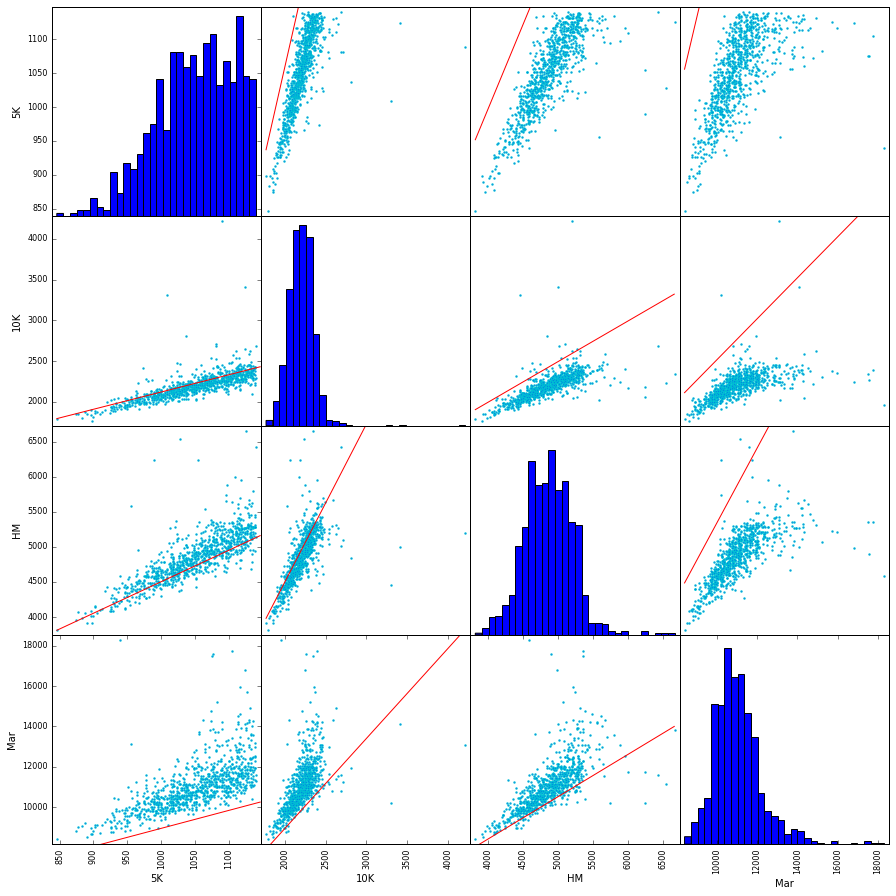

In [130]:
axes = pd.scatter_matrix(df_data_M_full, figsize=(15, 15),
                      hist_kwds={'bins': 30}, s=10, alpha=.8, color = 'darkturquoise')

axes[0, 1].plot(time_10k, time_10k_5k, color = 'r')
axes[0, 2].plot(time_HM, time_HM_5k, color = 'r')
axes[0, 3].plot(time_Mar, time_Mar_5k, color = 'r')
axes[1, 0].plot(time_5k, time_5k_10k, color = 'r')
axes[1, 2].plot(time_HM, time_HM_10k, color = 'r')
axes[1, 3].plot(time_Mar, time_Mar_10k, color = 'r')
axes[2, 0].plot(time_5k, time_5k_HM, color = 'r')
axes[2, 1].plot(time_10k, time_10k_HM, color = 'r')
axes[2, 3].plot(time_Mar, time_Mar_HM, color = 'r')
axes[3, 0].plot(time_5k, time_5k_Mar, color = 'r')
axes[3, 1].plot(time_10k, time_10k_Mar, color = 'r')
axes[3, 2].plot(time_HM, time_HM_Mar, color = 'r')

In [160]:
# Machine Learning

X = df_data_M_full[['5K', 'HM', 'Mar']]
y = df_data_M_full['10K']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
ridge = Ridge(alpha=1).fit(X_train, y_train)
print("training set score: %.2f" % ridge.score(X_train, y_train)) 
print("test set score: %.2f" % ridge.score(X_test, y_test))

example_times = np.array([25*60, 100*60, 4*60*60]).reshape(-1, 1)
ridge.predict(example_times)

training set score: 0.53
test set score: 0.74


ValueError: shapes (3,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)